# Initialization

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('insurance.txt')
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## Function to normalize dataset
### normalize_dataset function normalizes the dataset by using the formula
## $X_{normalized} = \frac {X - min(X_i)} {max(X_i) - min(X_i)}$

In [3]:
def normalize_dataset():

    # normalize_coeff stores max and min of every column in dataset for denormalization
    normalize_coeff = {col: {'max': df[col].max(), 'min': df[col].min()} for col in df.columns}

    # normal_df is the normalized dataframe
    normal_df = (df - df.min()) / (df.max() - df.min())

    return pd.DataFrame(normal_df), normalize_coeff

In [4]:
normal_df, normalize_coeff = normalize_dataset()

# Inserting bias column in dataframe
normal_df.insert(0, 'bias', [1] * len(normal_df))

print(normal_df.head())
# print()
# print(normalize_coeff)

   bias       age       bmi  children   charges
0     1  0.021739  0.321227       0.0  0.251611
1     1  0.000000  0.479150       0.2  0.009636
2     1  0.217391  0.458434       0.6  0.053115
3     1  0.326087  0.181464       0.0  0.333010
4     1  0.304348  0.347592       0.0  0.043816


## Function to shuffle the dataset and return $X_{train}, Y_{train}, X_{test}, Y_{test}$ matrices 

In [5]:
def shuffle(dataframe, ratio, target):
    columns = list(dataframe.columns)
    columns.remove(target)
    train_len = int(len(dataframe) * ratio + 1)
    sf = dataframe.sample(frac = 1)
    X = sf[columns]
    Y = sf[target]
    X_train = np.reshape(X.iloc[:train_len].to_numpy(), (-1, len(columns)))
    X_test = np.reshape(X.iloc[train_len:].to_numpy(), (-1, len(columns)))
    Y_train = np.reshape(Y.iloc[:train_len].to_numpy(), (-1, 1))
    Y_test = np.reshape(Y.iloc[train_len:].to_numpy(), (-1, 1))
    return X_train, Y_train, X_test, Y_test

## Function to initialize weights

In [6]:
def initialize_weights(X):
    num_features = X.shape[1]
    W = np.zeros((num_features, 1))
    return W

## Function to predict the results

In [7]:
def predict(W, X):
    predictions = X @ W         # '@' performs matrix multiplication
    return predictions

## Function to denormalize a column

In [8]:
def denormalize(arr, name):
    c = np.array(arr).flatten()
    c = np.apply_along_axis(lambda x: x * (normalize_coeff[name]['max'] - normalize_coeff[name]['min']) + normalize_coeff[name]['min'], 0, c)
    return c

## Functions to calculate Error and Accuracy
### Metric used for error -> MSE
## $ MSE = \frac {\sum_{i=1}^{m}{(y_i - \hat y_i)^2}} {2m} $

In [9]:
def calculate_error(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    sq_err = np.sum((y - y_hat) ** 2)
    mse = sq_err / (2 * len(y))
    return mse

### Metric used for accuracy -> $ R^2 $
## $ R^2 = 1- \frac {2 \times MSE} {Var(X)} $

In [10]:
def calculate_accuracy(X, y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    mse = calculate_error(y, y_hat)
    var_x = np.var(X)
    rMSE = 2 * mse / var_x
    R2 = 1 - rMSE   
    return R2

# Building Normal Equation Model
## Function to generate weight matrix W using normal equation
### $ W = (X^TX)^{-1}X^TY $

In [11]:
def get_weight_by_equations(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y    # '@' performs matrix multiplication
    return W

## Generating the model 20 times with different train-test split

In [12]:
W_normal = {}
train_accuracy_normal = {}
test_accuracy_normal = {}
train_cost_normal = {}
test_cost_normal = {}

for i in range(1, 21):
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_normal[i] = get_weight_by_equations(X_train, Y_train)
    train_predictions = predict(W_normal[i], X_train)
    test_predictions = predict(W_normal[i], X_test)
    train_accuracy_normal[i] = calculate_accuracy(X_train, Y_train, train_predictions)
    test_accuracy_normal[i] = calculate_accuracy(X_test, Y_test, test_predictions)
    train_cost_normal[i] = calculate_error(Y_train, train_predictions)
    test_cost_normal[i] = calculate_error(Y_test, test_predictions)

## Analyzing the models
### Analyzing costs

In [13]:
train_mean_cost_normal = np.mean(list(train_cost_normal.values()))
train_var_cost_normal = np.var(list(train_cost_normal.values()))
train_max_cost_normal = np.max(list(train_cost_normal.values()))
train_min_cost_normal = np.min(list(train_cost_normal.values()))

test_mean_cost_normal = np.mean(list(test_cost_normal.values()))
test_var_cost_normal = np.var(list(test_cost_normal.values()))
test_max_cost_normal = np.max(list(test_cost_normal.values()))
test_min_cost_normal = np.min(list(test_cost_normal.values()))

print(f'Mean train cost = {train_mean_cost_normal}')
print(f'Variance train cost = {train_var_cost_normal}')
print(f'Max train cost = {train_max_cost_normal}')
print(f'Min train cost = {train_min_cost_normal}')
print()
print(f'Mean test cost = {test_mean_cost_normal}')
print(f'Variance test cost = {test_var_cost_normal}')
print(f'Max test cost = {test_max_cost_normal}')
print(f'Min test cost = {test_min_cost_normal}')

Mean train cost = 0.016508321526920586
Variance train cost = 2.3876196067894383e-07
Max train cost = 0.017096866703940165
Min train cost = 0.015052487090348024

Mean test cost = 0.016306894896799255
Variance test cost = 1.344092075563025e-06
Max test cost = 0.0198813523849076
Min test cost = 0.015004216800214923


### Analyzing accuracies

In [14]:
train_mean_accuracy_normal = np.mean(list(train_accuracy_normal.values()))
train_var_accuracy_normal = np.var(list(train_accuracy_normal.values()))
train_max_accuracy_normal = np.max(list(train_accuracy_normal.values()))
train_min_accuracy_normal = np.min(list(train_accuracy_normal.values()))

test_mean_accuracy_normal = np.mean(list(test_accuracy_normal.values()))
test_var_accuracy_normal = np.var(list(test_accuracy_normal.values()))
test_max_accuracy_normal = np.max(list(test_accuracy_normal.values()))
test_min_accuracy_normal = np.min(list(test_accuracy_normal.values()))

print(f'Mean train accuracy = {train_mean_accuracy_normal}')
print(f'Variance train accuracy = {train_var_accuracy_normal}')
print(f'Max train accuracy = {train_max_accuracy_normal}')
print(f'Min train accuracy = {train_min_accuracy_normal}')
print()
print(f'Mean test accuracy = {test_mean_accuracy_normal}')
print(f'Variance test accuracy = {test_var_accuracy_normal}')
print(f'Max test accuracy = {test_max_accuracy_normal}')
print(f'Min test accuracy = {test_min_accuracy_normal}')

Mean train accuracy = 0.7447451538554642
Variance train accuracy = 6.055758292842565e-05
Max train accuracy = 0.7681380414398358
Min train accuracy = 0.7345907584220048

Mean test accuracy = 0.7489631623281848
Variance test accuracy = 0.00033778151551729026
Max test accuracy = 0.7711625746263333
Min test accuracy = 0.691275878862485


## Visualizing the results
### Cost vs model number plot

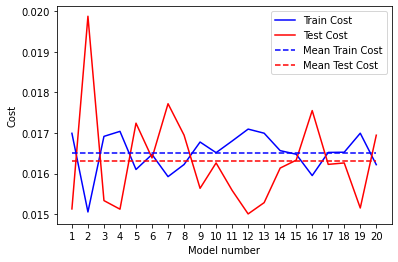

In [15]:
plt.figure()
plt.plot(train_cost_normal.keys(), train_cost_normal.values(), 'b-')
plt.plot(test_cost_normal.keys(), test_cost_normal.values(), 'r-')
plt.plot(train_cost_normal.keys(), [train_mean_cost_normal] * len(train_cost_normal), 'b--')
plt.plot(test_cost_normal.keys(), [test_mean_cost_normal] * len(test_cost_normal), 'r--')
plt.xlabel('Model number')
plt.ylabel('Cost')
plt.legend(['Train Cost', 'Test Cost', 'Mean Train Cost', 'Mean Test Cost'])
plt.xticks(list(train_cost_normal.keys()));

### Accuracy vs model number plot

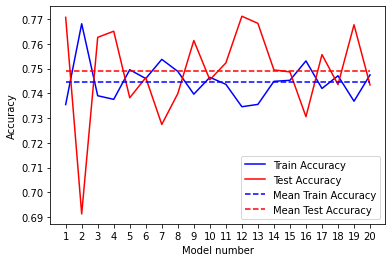

In [16]:
plt.figure()
plt.plot(train_accuracy_normal.keys(), train_accuracy_normal.values(), 'b-')
plt.plot(test_accuracy_normal.keys(), test_accuracy_normal.values(), 'r-')
plt.plot(train_accuracy_normal.keys(), [train_mean_accuracy_normal] * len(train_accuracy_normal), 'b--')
plt.plot(test_accuracy_normal.keys(), [test_mean_accuracy_normal] * len(test_accuracy_normal), 'r--')
plt.xlabel('Model number')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy', 'Mean Train Accuracy', 'Mean Test Accuracy'])
plt.xticks(list(train_accuracy_normal.keys()));

# Building Gradient Descent model
## Function for finding W using Gradient Descent

In [17]:
def gradient_descent(X, y, W, alpha = 0.1, epsilon = 1e-10, num_iterations = 1000):
    print_space = num_iterations // 10 if num_iterations > 10 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, num_iterations + 1):
        dW = (1 / m) * (X.T @ (X @ W - y))
        W = W - (alpha * dW)
        prediction = predict(W, X)
        cost = calculate_error(y, prediction)
        J[i] = cost
        acc = calculate_accuracy(X, y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} iterations is {cost}, accuracy = {acc}')
        if i != 1 and J[i-1] - J[i] < epsilon:
            break
    return W, J, accuracy

## Applying Gradient Descent
### 5 models are created with learning rates as 0.001, 0.005, 0.01, 0.05 and 0.1

In [18]:
W_gd = {}
train_cost_gd = {}
train_accuracy_gd = {}
alphas = [0.001, 0.005, 0.01, 0.05, 0.1]

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_init = initialize_weights(X_train)
    W_gd[alpha], train_cost_gd[alpha], train_accuracy_gd[alpha] = gradient_descent(X_train, Y_train, W_init, alpha = alpha, num_iterations = 300)
    print()

For alpha = 0.001
Cost after 1 iterations is 0.036289315795904366, accuracy = 0.4432654892168534
Cost after 30 iterations is 0.03476119988272045, accuracy = 0.46670916255947414
Cost after 60 iterations is 0.03330834628475133, accuracy = 0.4889981950023553
Cost after 90 iterations is 0.03197500402845151, accuracy = 0.509453737700996
Cost after 120 iterations is 0.030751318354878463, accuracy = 0.5282269779753669
Cost after 150 iterations is 0.02962824721947354, accuracy = 0.5454566348435435
Cost after 180 iterations is 0.02859749426765499, accuracy = 0.5612699872802888
Cost after 210 iterations is 0.027651447337903833, accuracy = 0.5757838176753041
Cost after 240 iterations is 0.02678312203649107, accuracy = 0.5891052774846186
Cost after 270 iterations is 0.02598610996558876, accuracy = 0.6013326814918372
Cost after 300 iterations is 0.02525453122100102, accuracy = 0.6125562365667823

For alpha = 0.005
Cost after 1 iterations is 0.03754632193976696, accuracy = 0.4172024954177542
Cost af

## Analyzing the models using random test sets

In [19]:
test_cost_gd = {}
test_accuracy_gd = {}

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    predictions = predict(W_gd[alpha], X_test)
    test_cost_gd[alpha] = calculate_error(Y_test, predictions)
    test_accuracy_gd[alpha] = calculate_accuracy(X_test, Y_test, predictions)
    print(f'Min cost = {test_accuracy_gd[alpha]}')
    print(f'Max accuracy = {test_accuracy_gd[alpha]}')
    print()

For alpha = 0.001
Min cost = 0.6133448601292797
Max accuracy = 0.6133448601292797

For alpha = 0.005
Min cost = 0.7062991492827918
Max accuracy = 0.7062991492827918

For alpha = 0.01
Min cost = 0.7189580805541772
Max accuracy = 0.7189580805541772

For alpha = 0.05
Min cost = 0.7473060525423008
Max accuracy = 0.7473060525423008

For alpha = 0.1
Min cost = 0.708315553161452
Max accuracy = 0.708315553161452



## Visualizing the results
### Cost vs iterations plot

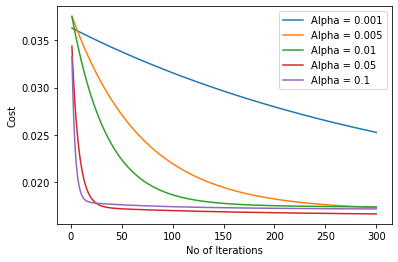

In [20]:
plt.figure()
legend = []
for alpha, error in train_cost_gd.items():
    plt.plot(error.keys(), error.values())
    legend.append(f'Alpha = {alpha}')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')
plt.legend(legend);

### Accuracy vs iterations plot

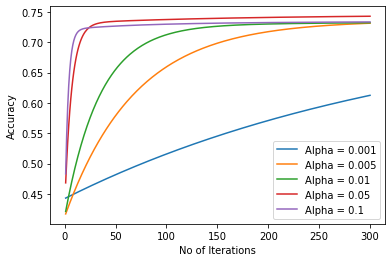

In [21]:
plt.figure()
legend = []
for alpha, accuracy in train_accuracy_gd.items():
    plt.plot(accuracy.keys(), accuracy.values())
    legend.append(f'Alpha = {alpha}')
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy')
plt.legend(legend);

# Building Stochastic Gradient Descent model
## Function for finding W using Stochastic Gradient Descent

In [22]:
def stochastic_gradient_descent(X, Y, W, alpha = 0.1, epochs = 1000):
    print_space = epochs // 10 if epochs > 10 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, epochs + 1):
        for j in range(m):
            x = np.resize(np.array(X[j]), (1, len(W)))
            y = np.resize(np.array(Y[j]), (1, 1))
            dW = (1 / m) * x.T @ (x @ W - y)
            W = W - (alpha * dW)
        prediction = predict(W, X)
        cost = calculate_error(Y, prediction)
        J[i] = cost
        acc = calculate_accuracy(X, Y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} epochs is {cost}, accuracy = {acc}')
    return W, J, accuracy

## Applying Stochastic Gradient Descent
### 5 models are created with learning rates as 0.001, 0.005, 0.01, 0.05 and 0.1

In [23]:
W_sgd = {}
train_cost_sgd = {}
train_accuracy_sgd = {}
alphas = [0.001, 0.005, 0.01, 0.05, 0.1]

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_init = initialize_weights(X_train)
    W_sgd[alpha], train_cost_sgd[alpha], train_accuracy_sgd[alpha] = stochastic_gradient_descent(X_train, Y_train, W_init, alpha = alpha, epochs = 300)
    print()

For alpha = 0.001
Cost after 1 epochs is 0.037218324351322704, accuracy = 0.4234264492716996
Cost after 30 epochs is 0.03560313073181576, accuracy = 0.4484484763657195
Cost after 60 epochs is 0.03406820824550164, accuracy = 0.4722269705201826
Cost after 90 epochs is 0.03266022577734564, accuracy = 0.4940389533317906
Cost after 120 epochs is 0.03136866579300502, accuracy = 0.514047358845173
Cost after 150 epochs is 0.030183882266785735, accuracy = 0.532401619991064
Cost after 180 epochs is 0.02909702846590252, accuracy = 0.5492387873278443
Cost after 210 epochs is 0.028099990718747556, accuracy = 0.5646845550808692
Cost after 240 epochs is 0.027185327671314187, accuracy = 0.5788542021611758
Cost after 270 epochs is 0.02634621457701258, accuracy = 0.5918534552086037
Cost after 300 epochs is 0.02557639220279402, accuracy = 0.6037792801206407

For alpha = 0.005
Cost after 1 epochs is 0.03586918993236582, accuracy = 0.4476099069566284
Cost after 30 epochs is 0.02937700468928805, accuracy = 

## Analyzing the models using random test sets

In [24]:
test_cost_sgd = {}
test_accuracy_sgd = {}

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    predictions = predict(W_sgd[alpha], X_test)
    test_cost_sgd[alpha] = calculate_error(Y_test, predictions)
    test_accuracy_sgd[alpha] = calculate_accuracy(X_test, Y_test, predictions)
    print(f'Min cost = {test_cost_sgd[alpha]}')
    print(f'Max accuracy = {test_accuracy_sgd[alpha]}')
    print()

For alpha = 0.001
Min cost = 0.024028050600931706
Max accuracy = 0.6341996685863528

For alpha = 0.005
Min cost = 0.017826171694297396
Max accuracy = 0.7306948977962673

For alpha = 0.01
Min cost = 0.017006223431648277
Max accuracy = 0.7397544200109476

For alpha = 0.05
Min cost = 0.016966284769434025
Max accuracy = 0.7410335446011779

For alpha = 0.1
Min cost = 0.016432931642094688
Max accuracy = 0.751674289865919



## Visualizing the results
### Cost vs epochs plot

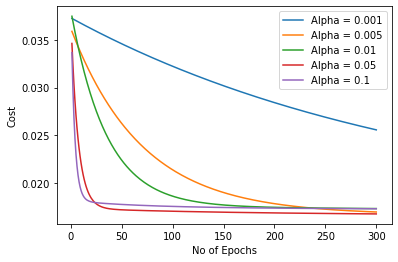

In [25]:
plt.figure()
legend = []
for alpha, error in train_cost_sgd.items():
    plt.plot(error.keys(), error.values())
    legend.append(f'Alpha = {alpha}')
plt.xlabel('No of Epochs')
plt.ylabel('Cost')
plt.legend(legend);

### Accuracy vs epochs plot

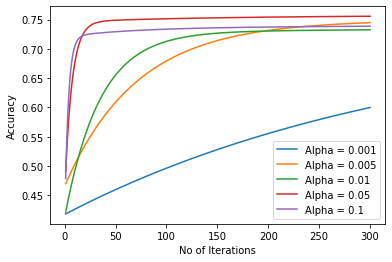

In [27]:
plt.figure()
legend = []
for alpha, accuracy in train_accuracy_sgd.items():
    plt.plot(accuracy.keys(), accuracy.values())
    legend.append(f'Alpha = {alpha}')
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy')
plt.legend(legend);